<a href="https://colab.research.google.com/github/paramita-pp/time-series-analysis/blob/main/ABC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import inventorize as inv

In [4]:
grouped = pd.read_csv('for_abc.csv')

In [6]:
grouped.head()

,StockCode,Description,quantity,revenue
0,10080,check,22,0.00
1,10080,GROOVY CACTUS INFLATABLE,121,47.19
2,10120,DOGGY RUBBER,72,15.12
3,10124A,SPOTS ON RED BOOKCOVER TAPE,4,1.68
4,10124G,ARMY CAMO BOOKCOVER TAPE,8,3.36


In [9]:
a = inv.ABC(grouped[['Description', 'revenue']])
a

,Description,revenue,Percentage,comulative,Category
3436,DOTCOM POSTAGE,85834.48,0.021789,0.021789,A
1784,RABBIT NIGHT LIGHT,56894.39,0.014442,0.036231,A
862,PAPER CHAIN KIT 50'S CHRISTMAS,50907.49,0.012923,0.049154,A
1152,REGENCY CAKESTAND 3 TIER,40183.50,0.010200,0.059354,A
3036,JUMBO BAG RED RETROSPOT,31101.76,0.007895,0.067249,A
...,...,...,...,...,...
1466,check,0.00,0.000000,1.000000,C
1467,found,0.00,0.000000,1.000000,C
2490,check,0.00,0.000000,1.000000,C
2763,adjustment,0.00,0.000000,1.000000,C


In [10]:
a.Category.value_counts()

,count
Category,
C,1949
B,804
A,690


<Axes: xlabel='Category', ylabel='count'>

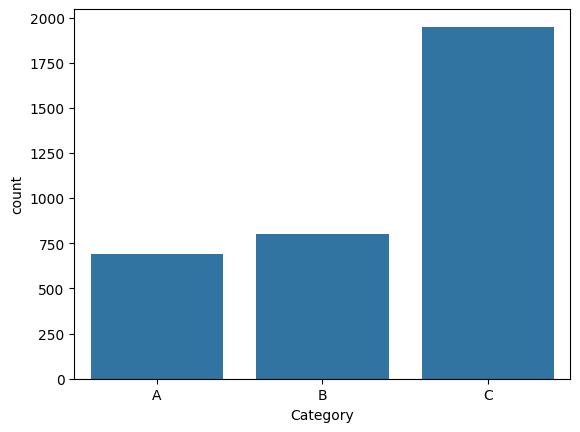

In [12]:
sns.countplot(x = 'Category', data = a)

<Axes: xlabel='Category', ylabel='revenue'>

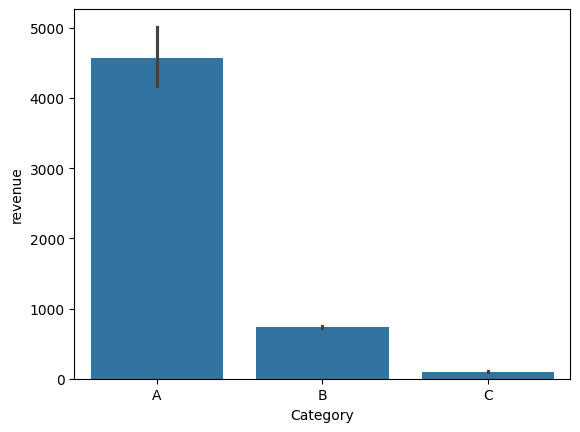

In [13]:
sns.barplot(x = 'Category', y = 'revenue', data = a)

In [14]:
### multiple abc analysis
b = inv.productmix(grouped['Description'], grouped['quantity'] , grouped['revenue'])
b.columns

Index(['skus', 'sales', 'revenue', 'sales_mix', 'comulative_sales',
       'revenue_mix', 'comulative_revenue', 'sales_category',
       'revenue_category', 'product_mix'],
      dtype='object')

In [16]:
b.product_mix.value_counts()

,count
product_mix,
C_C,1661
A_A,496
B_B,343
B_C,237
C_B,236
A_B,225
B_A,167
A_C,51
C_A,27


<Axes: xlabel='product_mix', ylabel='count'>

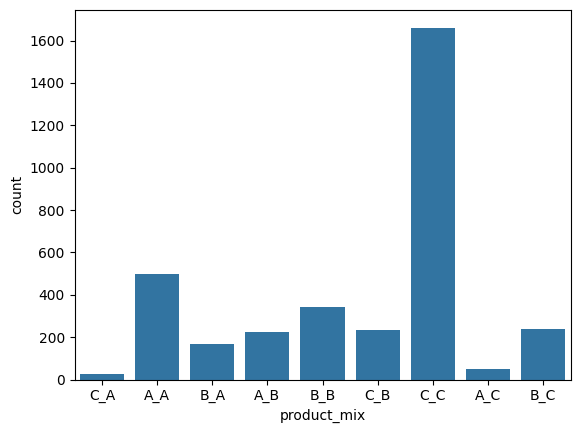

In [17]:
sns.countplot(x = 'product_mix', data = b)

<Axes: xlabel='product_mix', ylabel='sales'>

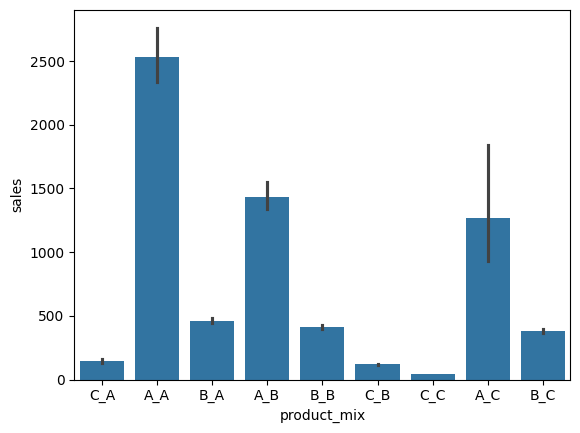

In [19]:
sns.barplot(x = 'product_mix', y = 'sales', data = b)

<Axes: xlabel='product_mix', ylabel='revenue'>

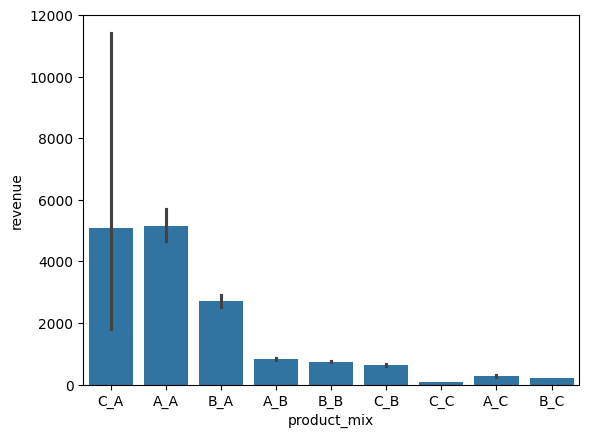

In [20]:
sns.barplot(x = 'product_mix', y = 'revenue', data = b)